Import libraries

In [1]:
import csv
import requests
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import datetime

Empty dataframe for api data to go into

In [2]:
data = []
df = pd.DataFrame(data)

API only allows five calls per minute, each call is for one month, so I will create a recursive function to bring in the data and append onto the created dataframe.

In [3]:
year = [1]
month = [1,2,3,4,5]

In [4]:
for i in year:
    for j in month:
        with requests.Session() as s:
            download = s.get('https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=IBM&interval=60min&slice=year'+str(i)+'month'+str(j)+'&outputsize=full&apikey=73S9HSOL3AL4PHV5')
            decoded_content = download.content.decode('utf-8')
            cr = csv.reader(decoded_content.splitlines(), delimiter=',')
            my_list = list(cr)
            for row in my_list:
                df = df.append(my_list, ignore_index = True)
                


/var/folders/xh/8q06gt11787bp2l0dwrrvrwr0000gn/T/ipykernel_7229/2966128647.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_list, ignore_index = True)


In [5]:
df.head()

,0,1,2,3,4,5
0,time,open,high,low,close,volume
1,2023-04-27 20:00:00,126.9,126.9,126.9,126.9,153
2,2023-04-27 19:00:00,126.73,126.95,126.73,126.73,889
3,2023-04-27 18:00:00,126.95,126.95,126.7397,126.7397,245
4,2023-04-27 17:00:00,126.97,127.1,126.72,126.72,60942


Column headers were added as first row

In [6]:
df.columns = df.iloc[0] #Make column first row 
df = df[1:] #Remove first row

In [7]:
df = df.dropna()

In [8]:
df.shape

(326825, 6)

For each API call column names would be present

In [9]:
df = df[df['open'] != 'open'] #Removing other rows that contain the headers

In [10]:
df.shape

(325550, 6)

In [11]:
df.drop_duplicates(keep = 'first') #Remove any duplicates

,time,open,high,low,close,volume
1,2023-04-27 20:00:00,126.9,126.9,126.9,126.9,153
2,2023-04-27 19:00:00,126.73,126.95,126.73,126.73,889
3,2023-04-27 18:00:00,126.95,126.95,126.7397,126.7397,245
4,2023-04-27 17:00:00,126.97,127.1,126.72,126.72,60942
5,2023-04-27 16:00:00,126.95,127.02,126.64,126.97,733135
...,...,...,...,...,...,...
271831,2022-11-29 11:00:00,144.7246122599707,145.37340841949805,144.7246122599707,145.09010339734147,302551
271832,2022-11-29 10:00:00,144.37887740029566,145.03083456425432,143.92448301329418,144.71473412112286,364588
271833,2022-11-29 09:00:00,144.50719442392935,144.50729320531784,144.3986336779914,144.3986336779914,147396
271834,2022-11-29 08:00:00,144.8036373707536,144.8036373707536,144.50729320531784,144.78388109305786,6275


In [12]:
df.tail(2)

,time,open,high,low,close,volume
326824,2022-11-29 08:00:00,144.8036373707536,144.8036373707536,144.50729320531784,144.78388109305786,6275
326825,2022-11-29 05:00:00,144.8727843426886,144.8727843426886,144.8727843426886,144.8727843426886,300


In [13]:
df.dtypes

0
time      object
open      object
high      object
low       object
close     object
volume    object
dtype: object

Convert time column to datetime and numerical columns to float

In [14]:
df['time'] = pd.to_datetime(df['time'], format = "%Y-%m-%d %H:%M:%S") #Make datetime match the format of the column

In [15]:
df.dtypes #Validating change

0
time      datetime64[ns]
open              object
high              object
low               object
close             object
volume            object
dtype: object

In [16]:
df.head(2)

,time,open,high,low,close,volume
1,2023-04-27 20:00:00,126.9,126.9,126.9,126.9,153
2,2023-04-27 19:00:00,126.73,126.95,126.73,126.73,889


In [17]:
df = df.astype({'open':'float','high':'float','low':'float','close':'float','volume':'float',}) #Convert rest of values to float

In [18]:
df.dtypes

0
time      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
dtype: object

In [19]:
df.head()

,time,open,high,low,close,volume
1,2023-04-27 20:00:00,126.90,126.90,126.9000,126.9000,153.0
2,2023-04-27 19:00:00,126.73,126.95,126.7300,126.7300,889.0
3,2023-04-27 18:00:00,126.95,126.95,126.7397,126.7397,245.0
4,2023-04-27 17:00:00,126.97,127.10,126.7200,126.7200,60942.0
5,2023-04-27 16:00:00,126.95,127.02,126.6400,126.9700,733135.0


The time column will be made the index

In [20]:
df.set_index('time', inplace = True) #Make the time column the index

In [21]:
df.head()

,open,high,low,close,volume
time,,,,,
2023-04-27 20:00:00,126.90,126.90,126.9000,126.9000,153.0
2023-04-27 19:00:00,126.73,126.95,126.7300,126.7300,889.0
2023-04-27 18:00:00,126.95,126.95,126.7397,126.7397,245.0
2023-04-27 17:00:00,126.97,127.10,126.7200,126.7200,60942.0
2023-04-27 16:00:00,126.95,127.02,126.6400,126.9700,733135.0


Any potential duplicates are removed

In [22]:
df = df.drop_duplicates(keep = 'first')

In [23]:
df.shape

(1270, 5)

Close price is plot

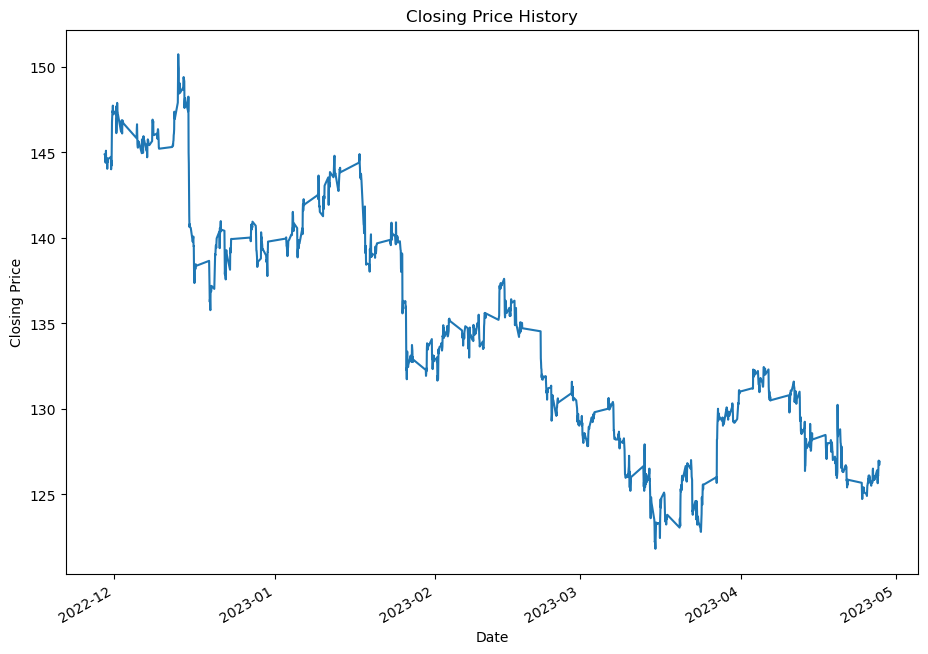

In [24]:
plt.figure(figsize=(11, 8)) # resizing the plot
df['close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Correlation between columns are highlighted, any columns too idential to close will be dropped

In [25]:
df.corr()

,open,high,low,close,volume
0,,,,,
open,1.000000,0.998409,0.998341,0.997761,-0.066057
high,0.998409,1.000000,0.996398,0.998039,-0.050026
low,0.998341,0.996398,1.000000,0.998492,-0.082739
close,0.997761,0.998039,0.998492,1.000000,-0.067176
volume,-0.066057,-0.050026,-0.082739,-0.067176,1.000000


Box plot to get an idea of the spread of data

<AxesSubplot:>

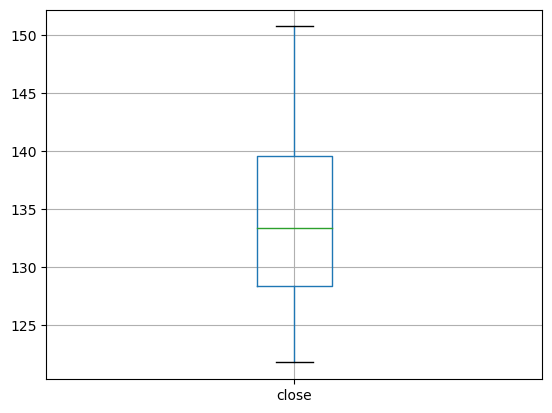

In [26]:
df.boxplot(column=['close'])

<Figure size 1600x800 with 0 Axes>

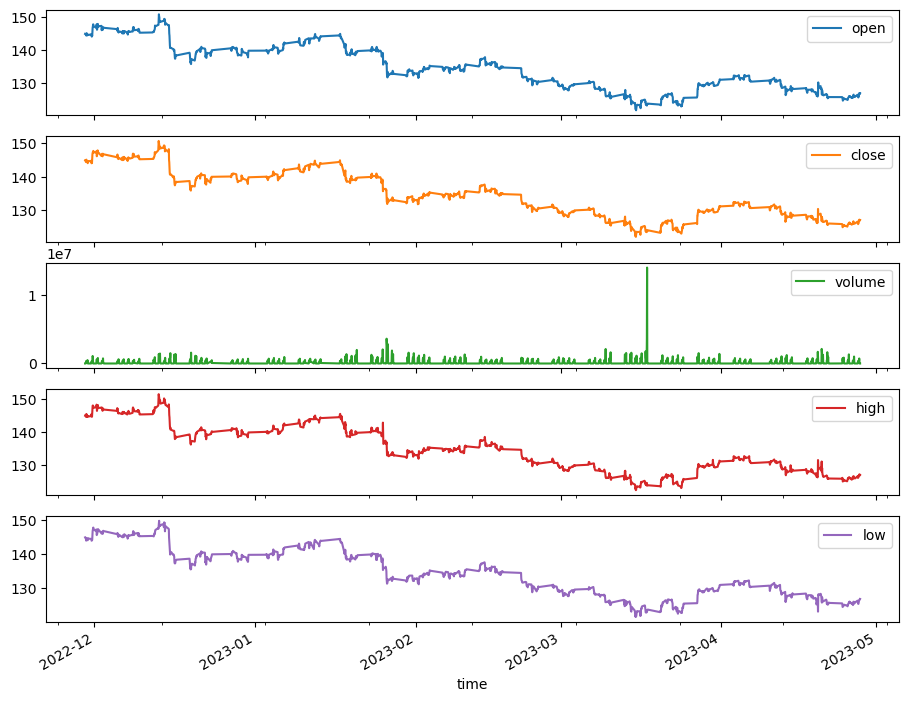

In [27]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['open', 'close', 'volume', 'high', 'low']
axes = df[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

In [28]:
df.isnull().sum()

0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

The range and %change of between the values are calculated to add features for the model

In [29]:
df['HL_PCT_RANGE'] = (df['high'] - df['low']) / df['low'] * 100.0

In [30]:
df['PCT_CHANGE'] = (df['close'] - df['open']) / df['open'] * 100.0

In [31]:
df.head()

,open,high,low,close,volume,HL_PCT_RANGE,PCT_CHANGE
time,,,,,,,
2023-04-27 20:00:00,126.90,126.90,126.9000,126.9000,153.0,0.000000,0.000000
2023-04-27 19:00:00,126.73,126.95,126.7300,126.7300,889.0,0.173597,0.000000
2023-04-27 18:00:00,126.95,126.95,126.7397,126.7397,245.0,0.165931,-0.165656
2023-04-27 17:00:00,126.97,127.10,126.7200,126.7200,60942.0,0.299874,-0.196897
2023-04-27 16:00:00,126.95,127.02,126.6400,126.9700,733135.0,0.300063,0.015754


Data is sorted by index time

In [32]:
df = df.sort_index()

In [33]:
df.head(3)

,open,high,low,close,volume,HL_PCT_RANGE,PCT_CHANGE
time,,,,,,,
2022-11-29 05:00:00,144.872784,144.872784,144.872784,144.872784,300.0,0.000000,0.000000
2022-11-29 08:00:00,144.803637,144.803637,144.507293,144.783881,6275.0,0.205072,-0.013643
2022-11-29 09:00:00,144.507194,144.507293,144.398634,144.398634,147396.0,0.075250,-0.075125


In [34]:
df.shape

(1270, 7)

We want to forecast 5% of the length of data

In [35]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['close'].shift(-forecast_out)

64


In [36]:
#Model

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Data is standardised to have a modular value <1

In [38]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

/var/folders/xh/8q06gt11787bp2l0dwrrvrwr0000gn/T/ipykernel_7229/90488812.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


X_Pred is data to be predicted, X is data to be trained

In [39]:
X_Pred = X[-forecast_out:] #Data to be predicted
X = X[:-forecast_out] # data to be trained

Removed the additional 64 rows added

In [40]:
df.dropna(inplace=True)

In [41]:
y = np.array(df['label'])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
lr_confidence

0.7228335043035501

In [44]:
rg = Ridge()
rg.fit(X_train, y_train)
rg_confidence = rg.score(X_test, y_test)
rg_confidence

0.7225369364798799

In [45]:
svr = SVR()
svr.fit(X_train, y_train)
svr_confidence = svr.score(X_test, y_test)
svr_confidence

0.7263119725534625

In [46]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)
rf_confidence

0.7901882833573184

In [47]:
names = ['Linear Regression', 'Ridge', 'SVR','Random Forest']
columns = ['model', 'accuracy']
scores = [lr_confidence, rg_confidence, svr_confidence, rf_confidence]
alg_vs_score = pd.DataFrame([[x, y] for x, y in zip(names, scores)], columns = columns)
alg_vs_score

,model,accuracy
0,Linear Regression,0.722834
1,Ridge,0.722537
2,SVR,0.726312
3,Random Forest,0.790188


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Ridge'),
  Text(2, 0, 'SVR'),
  Text(3, 0, 'Random Forest')])

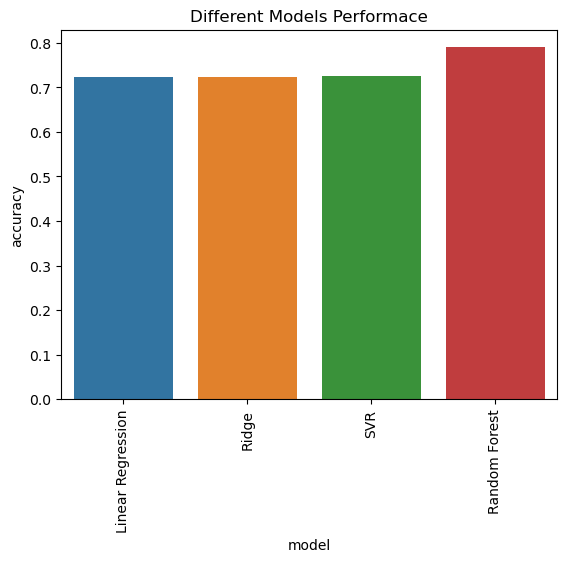

In [48]:
sns.barplot(data = alg_vs_score, x='model', y='accuracy' )
plt.title("Different Models Performace")
plt.xticks(rotation='vertical')

In [49]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Pred) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

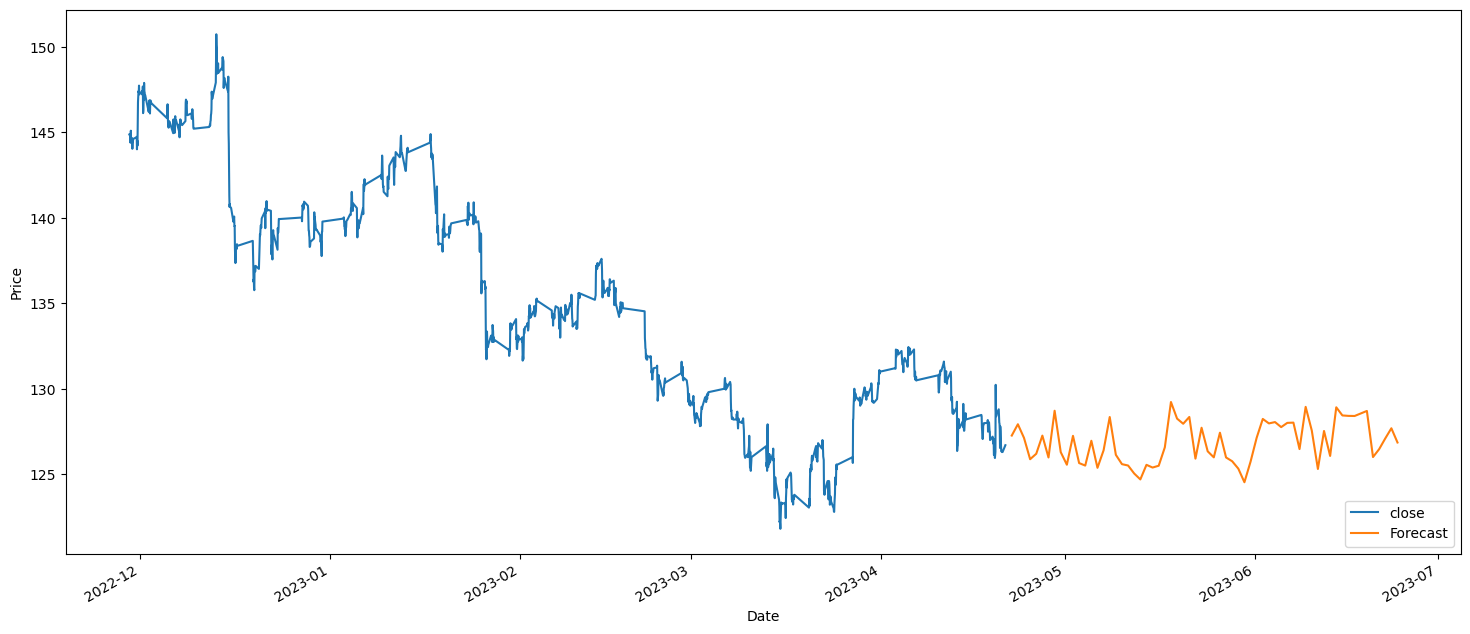

In [50]:
plt.figure(figsize=(18, 8))
df['close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()